Texture Features

consider not only the absolute value(color/intensity) of pixels but relationships between pixel values within 
a image region.
-a given color found in a flat region differs from the same color found in a region with high variance
-texture descriptors allow to differentiate between patterns of pixel variances

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import imageio

from skimage import feature

In [ ]:
#Will primarily use LBP as texture descriptor from scikit-image package

In [3]:
def lbp_features(img, radius=1, sampling_pixels=8):
    #LBP operates in a single channel so if RGB images are provided we must convert to greyscale
    if (len(img.shape)>2):
        img = img.astype(float)
        #RGB to greyscale using Luminance
        img = img[:,:,0]*0.3 + img[:,:,1]*0.59 + img[:,:,2]*0.11
        
    # Converting to uint8 type for 256 grey levels
    img = img.astype(np.uint8)
    
    #normalize values, can improve description
    i_min = np.min(img)
    i_max = np.max(img)
    if (i_max -i_min !=0):
        img = (img - i_min)/(i_max - i_min)
        
    #Compute LBP
    lbp = feature.local_binary_pattern(img, sampling_pixels, radius, method="uniform")
    
    #LBP returns matrix with the codes, we compute histogram
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, sampling_pixels + 3), range=(0, sampling_pixels + 2))
    
    # normalization
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)
    # return the histogram of Local Binary Patterns
    return hist

def Euclidean_distance(p, q):
    dist = np.sqrt(np.sum(np.square(p-q)))
    return dist

In [4]:
img1 = imageio.imread("texture_dotted.jpg")
img2 = imageio.imread("texture_dotted3.jpg")
img3 = imageio.imread("texture_dotted2.jpg")
img4 = imageio.imread("texture_interlaced.jpg")
img5 = imageio.imread("texture_chequered.jpg")
img6 = imageio.imread("texture_sprinkled.jpg")

#Use radius of 2 and 8, but this can be changed
lbp1 = lbp_features(img1,2,8)
lbp2 = lbp_features(img2,2,8)
lbp3 = lbp_features(img3,2,8)
lbp4 = lbp_features(img4,2,8)
lbp5 = lbp_features(img5,2,8)
lbp6 = lbp_features(img6,2,8)

#Comparing texture of first image to others
dQ2_H = Euclidean_distance(lbp1, lbp2)
dQ3_H = Euclidean_distance(lbp1, lbp3)
dQ4_H = Euclidean_distance(lbp1, lbp4)
dQ5_H = Euclidean_distance(lbp1, lbp5)
dQ6_H = Euclidean_distance(lbp1, lbp6)

Text(0.5, 1.0, 'Rank 5 : 0.3151')

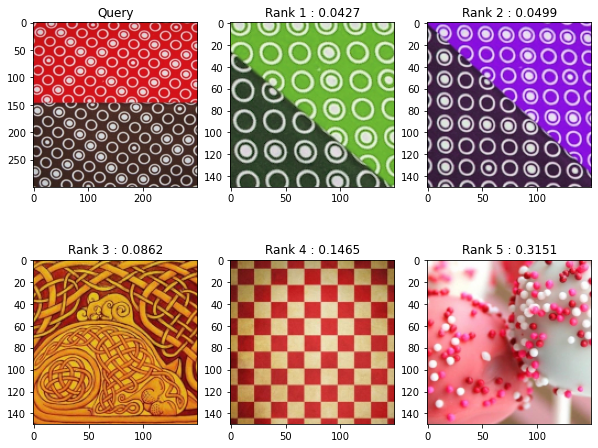

In [5]:
plt.figure(figsize=(10,8))
plt.subplot(231); plt.imshow(img1); plt.title('Query')
plt.subplot(232); plt.imshow(img3); plt.title('Rank 1 : %.4f' % dQ3_H)
plt.subplot(233); plt.imshow(img2); plt.title('Rank 2 : %.4f' % dQ2_H)
plt.subplot(234); plt.imshow(img4); plt.title('Rank 3 : %.4f' % dQ4_H)
plt.subplot(235); plt.imshow(img5); plt.title('Rank 4 : %.4f' % dQ5_H)
plt.subplot(236); plt.imshow(img6); plt.title('Rank 5 : %.4f' % dQ6_H)

In [6]:
# The decimal value returned is the euclidian distance from that image to the query image based on lbp descriptor

(-0.8900000000000001, 9.89, 0.0, 0.2962866666534984)

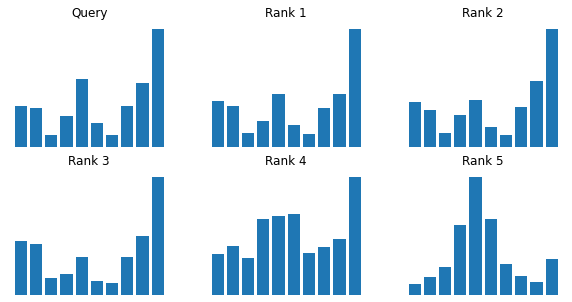

In [7]:
vals = range(len(lbp1))
plt.figure(figsize=(10,5))
plt.subplot(231); plt.bar(vals,lbp1); 
plt.title('Query'); plt.axis('off')
plt.subplot(232); plt.bar(vals,lbp3); 
plt.title('Rank 1'); plt.axis('off')
plt.subplot(233); plt.bar(vals,lbp2); 
plt.title('Rank 2'); plt.axis('off')
plt.subplot(234); plt.bar(vals,lbp4); 
plt.title('Rank 3'); plt.axis('off')
plt.subplot(235); plt.bar(vals,lbp5); 
plt.title('Rank 4'); plt.axis('off')
plt.subplot(236); plt.bar(vals,lbp6); 
plt.title('Rank 5'); plt.axis('off')